# Working with data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Loading the dataset
df = pd.read_csv(r'/kaggle/input/gender-inequality-index/Gender_Inequality_Index.csv')

In [3]:
# Inspecting the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                195 non-null    object 
 1   Human_development      191 non-null    object 
 2   GII                    170 non-null    float64
 3   Rank                   170 non-null    float64
 4   Maternal_mortality     184 non-null    float64
 5   Adolescent_birth_rate  195 non-null    float64
 6   Seats_parliament       193 non-null    float64
 7   F_secondary_educ       177 non-null    float64
 8   M_secondary_educ       177 non-null    float64
 9   F_Labour_force         180 non-null    float64
 10  M_Labour_force         180 non-null    float64
dtypes: float64(9), object(2)
memory usage: 16.9+ KB
None


In [4]:
print(df.describe())

              GII        Rank  Maternal_mortality  Adolescent_birth_rate  \
count  170.000000  170.000000          184.000000             195.000000   
mean     0.344376   85.376471          160.027174              44.597949   
std      0.197105   49.210206          233.028867              38.422479   
min      0.013000    1.000000            2.000000               1.600000   
25%      0.177500   43.250000           12.750000              10.750000   
50%      0.363000   85.500000           53.000000              36.200000   
75%      0.505750  127.750000          188.250000              64.200000   
max      0.820000  170.000000         1150.000000             170.500000   

       Seats_parliament  F_secondary_educ  M_secondary_educ  F_Labour_force  \
count        193.000000        177.000000        177.000000      180.000000   
mean          24.701554         62.706780         67.068362       50.224444   
std           12.404319         29.528487         26.450033       15.905491   

In [5]:
# Handling missing values
df = df.dropna() 

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 190
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                170 non-null    object 
 1   Human_development      170 non-null    object 
 2   GII                    170 non-null    float64
 3   Rank                   170 non-null    float64
 4   Maternal_mortality     170 non-null    float64
 5   Adolescent_birth_rate  170 non-null    float64
 6   Seats_parliament       170 non-null    float64
 7   F_secondary_educ       170 non-null    float64
 8   M_secondary_educ       170 non-null    float64
 9   F_Labour_force         170 non-null    float64
 10  M_Labour_force         170 non-null    float64
dtypes: float64(9), object(2)
memory usage: 15.9+ KB
None


In [7]:
df.head()

,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
0,Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7
1,Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0
2,Iceland,Very high,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5
4,Australia,Very high,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5
5,Denmark,Very high,0.013,1.0,4.0,1.9,39.7,95.1,95.2,57.7,66.7


# Relation betwen various dataset features

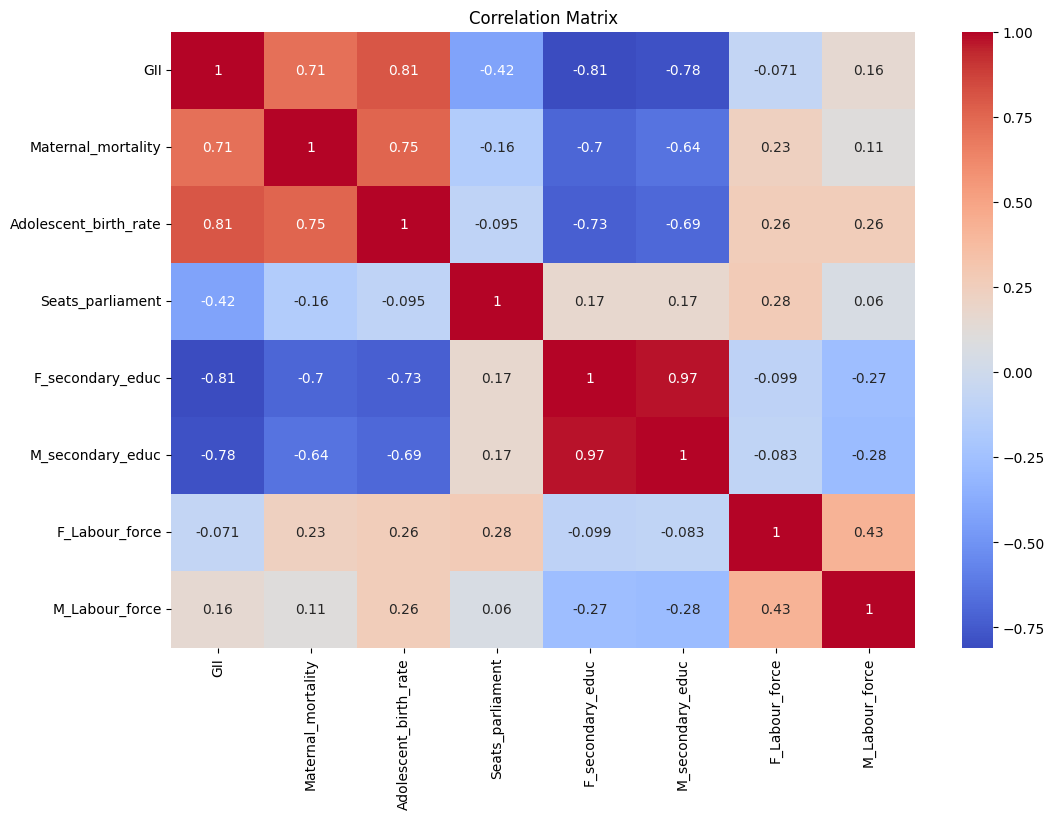

In [8]:
numerical_columns = ['GII', 'Maternal_mortality', 'Adolescent_birth_rate', 
                     'Seats_parliament', 'F_secondary_educ', 
                     'M_secondary_educ', 'F_Labour_force','M_Labour_force']

# Filtering the DataFrame to include only numerical columns
df_numerical = df[numerical_columns]

# Calculating the correlation matrix
correlation_matrix = df_numerical.corr()

# correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

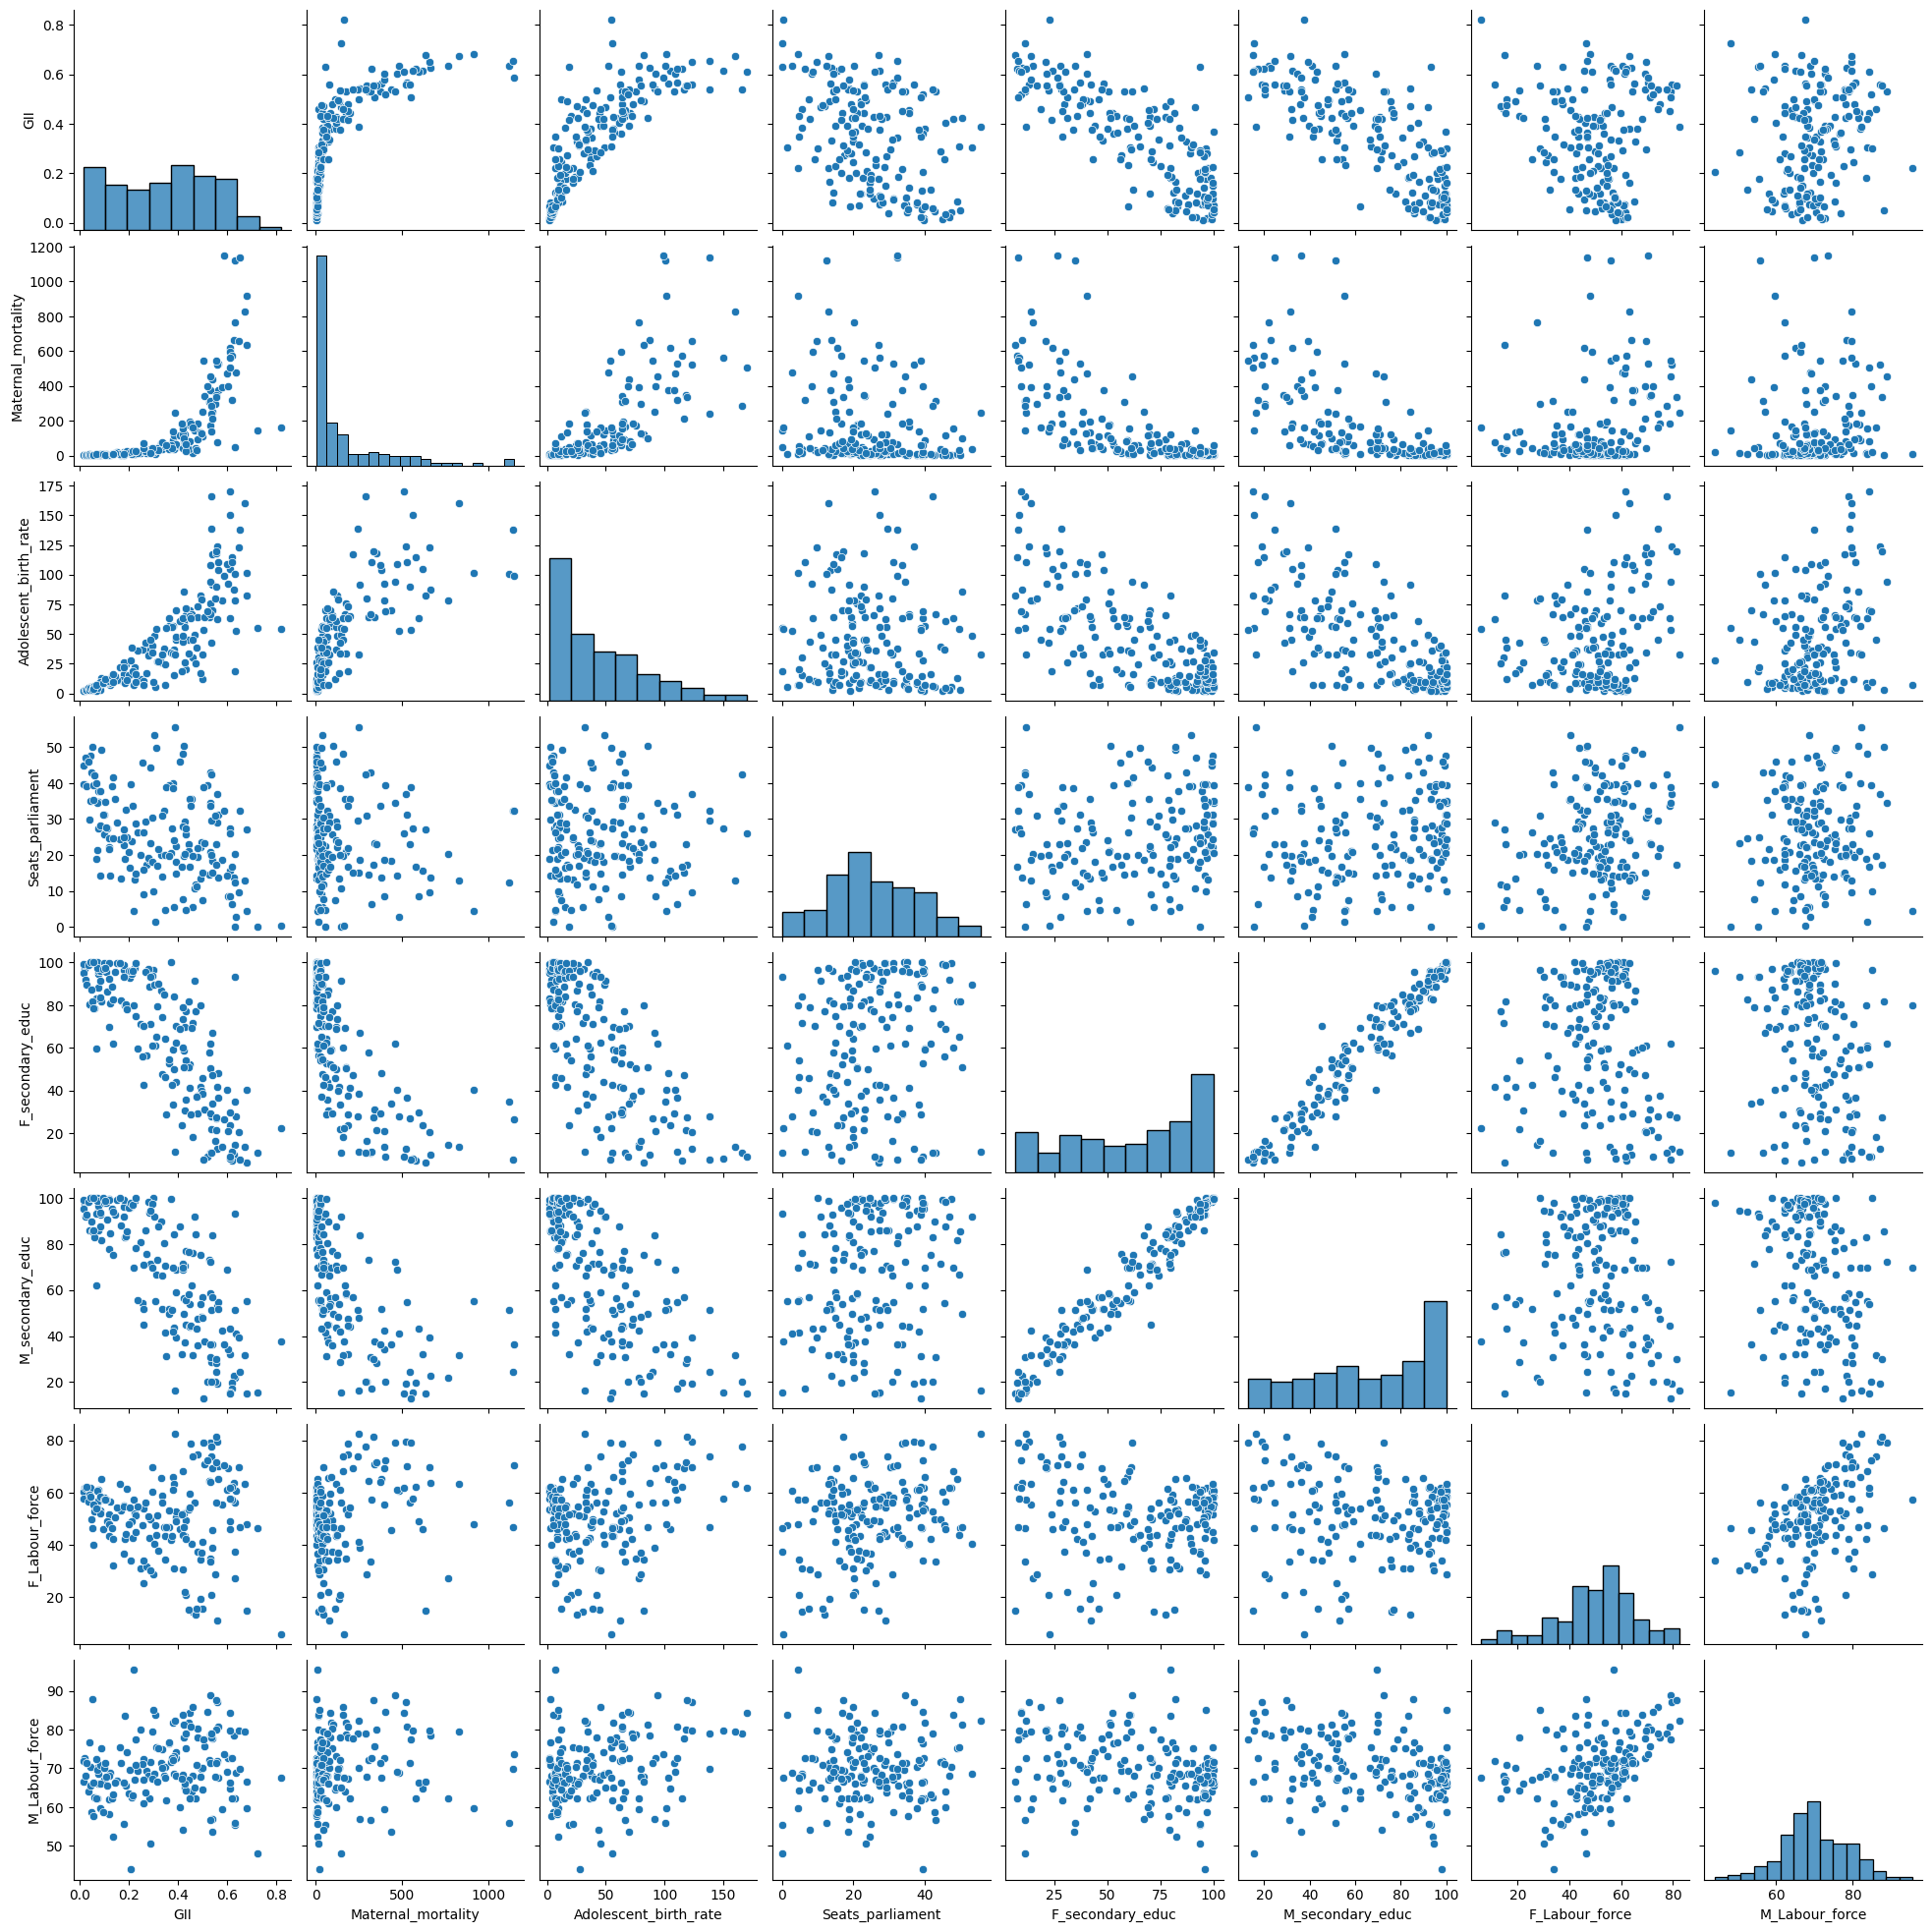

In [10]:
#Pairplot
sns.pairplot(df[['GII', 'Maternal_mortality', 'Adolescent_birth_rate', 'Seats_parliament',
                 'F_secondary_educ', 'M_secondary_educ', 'F_Labour_force','M_Labour_force']])

plt.show()

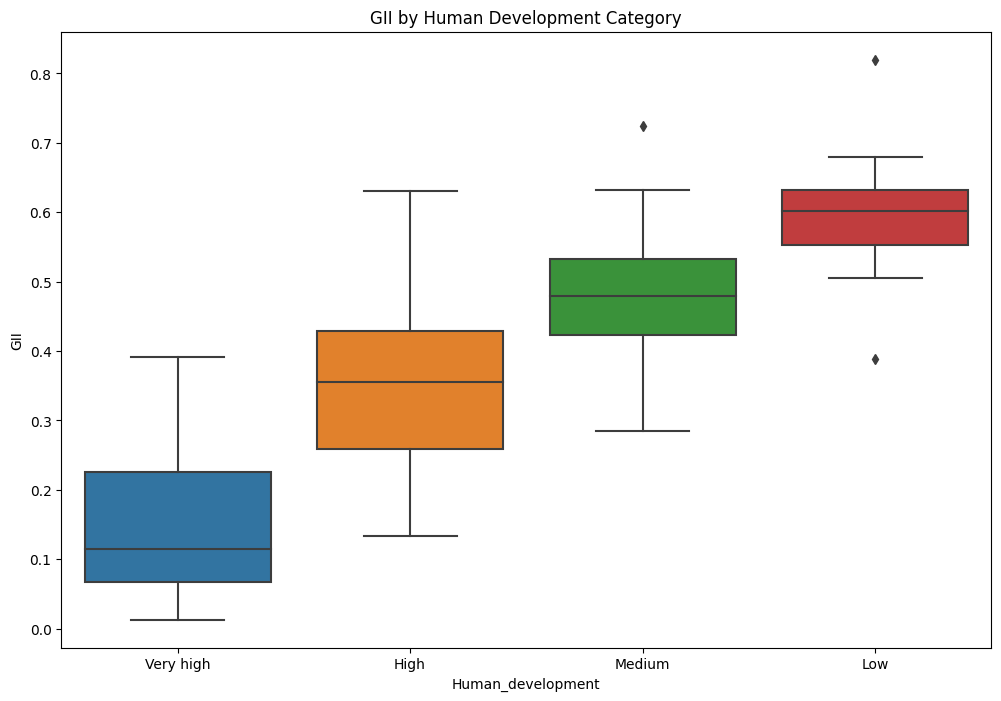

In [11]:
#Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Human_development', y='GII', data=df)
plt.title('GII by Human Development Category')
plt.show()

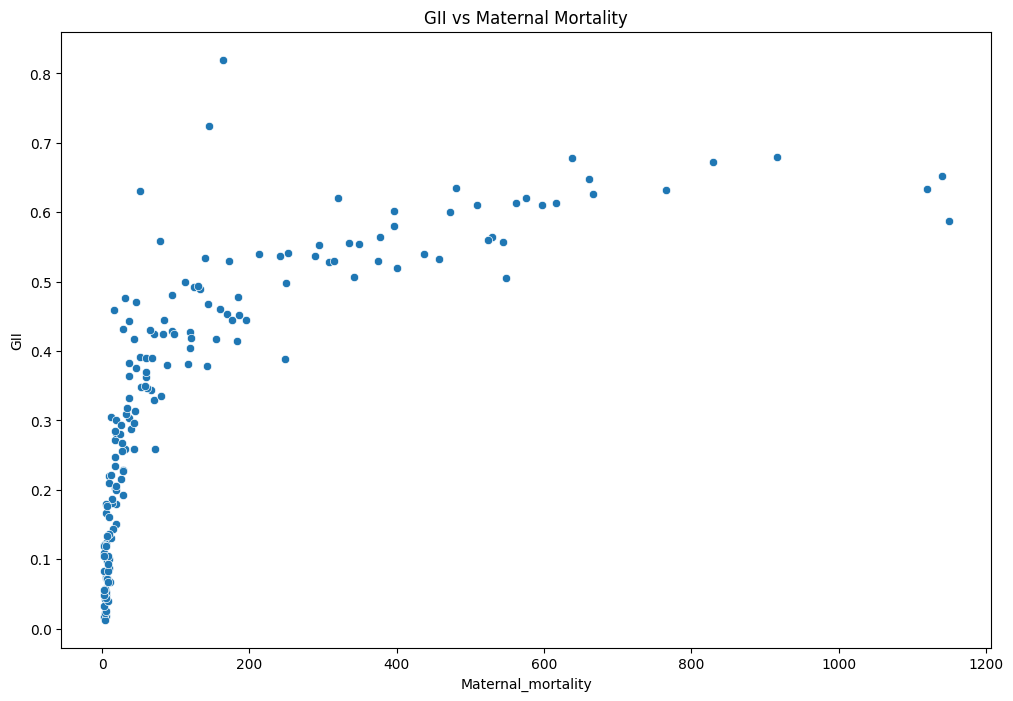

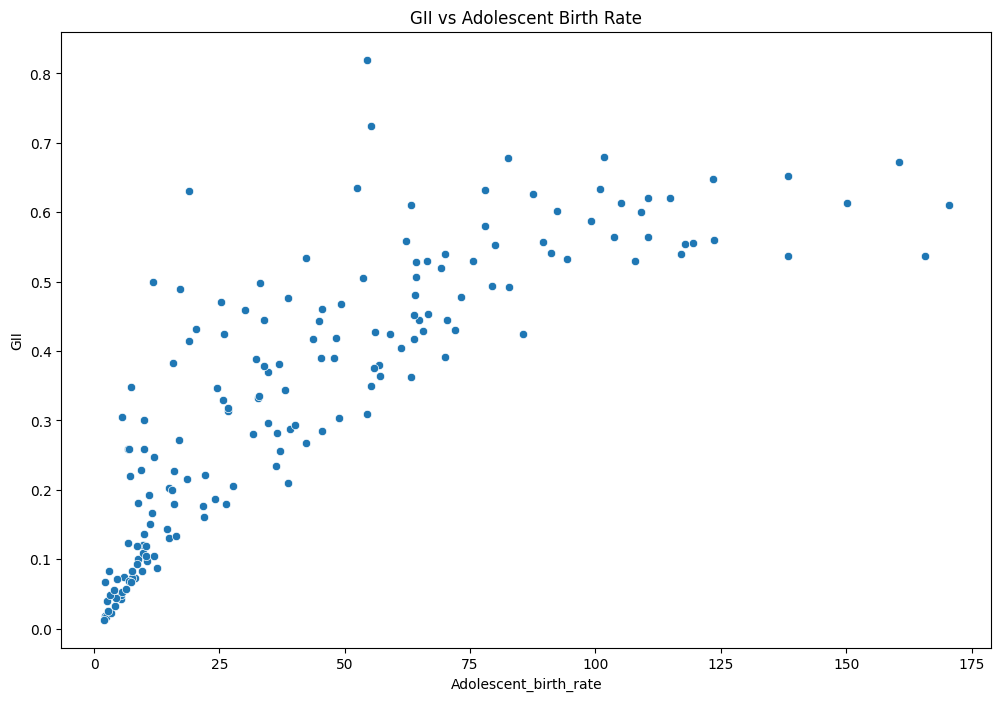

In [12]:
#Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Maternal_mortality', y='GII', data=df)
plt.title('GII vs Maternal Mortality')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Adolescent_birth_rate', y='GII', data=df)
plt.title('GII vs Adolescent Birth Rate')
plt.show()

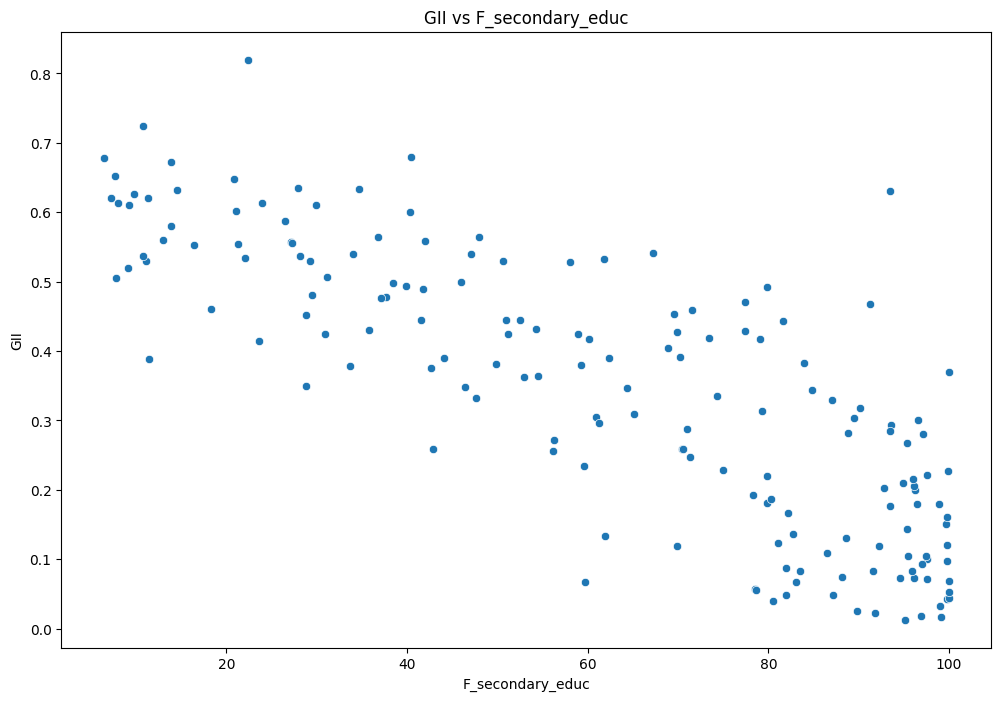

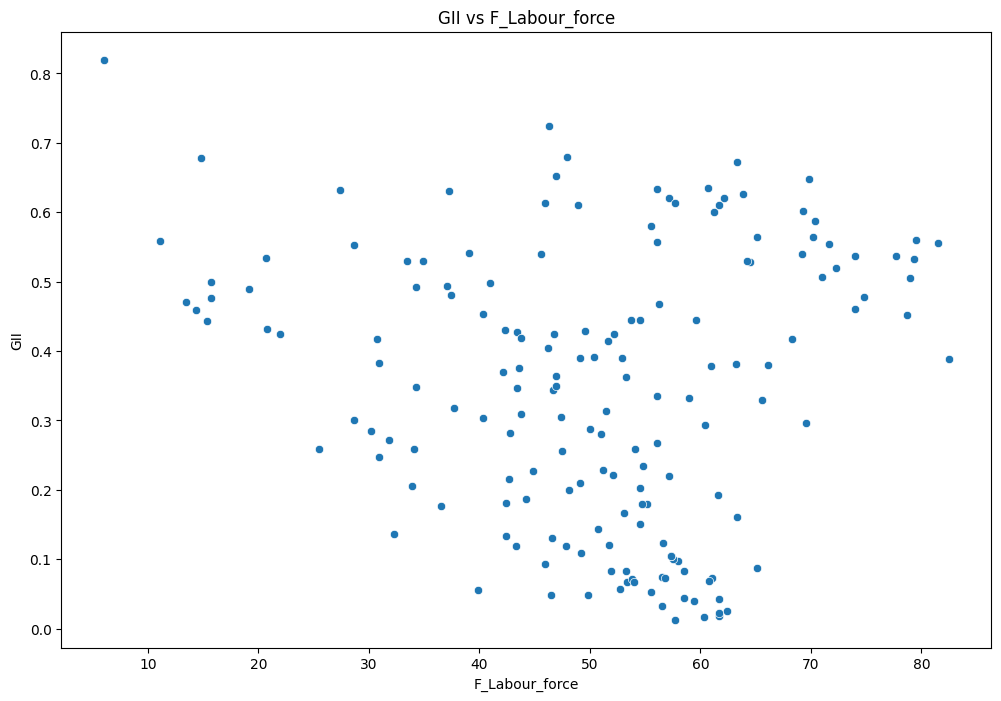

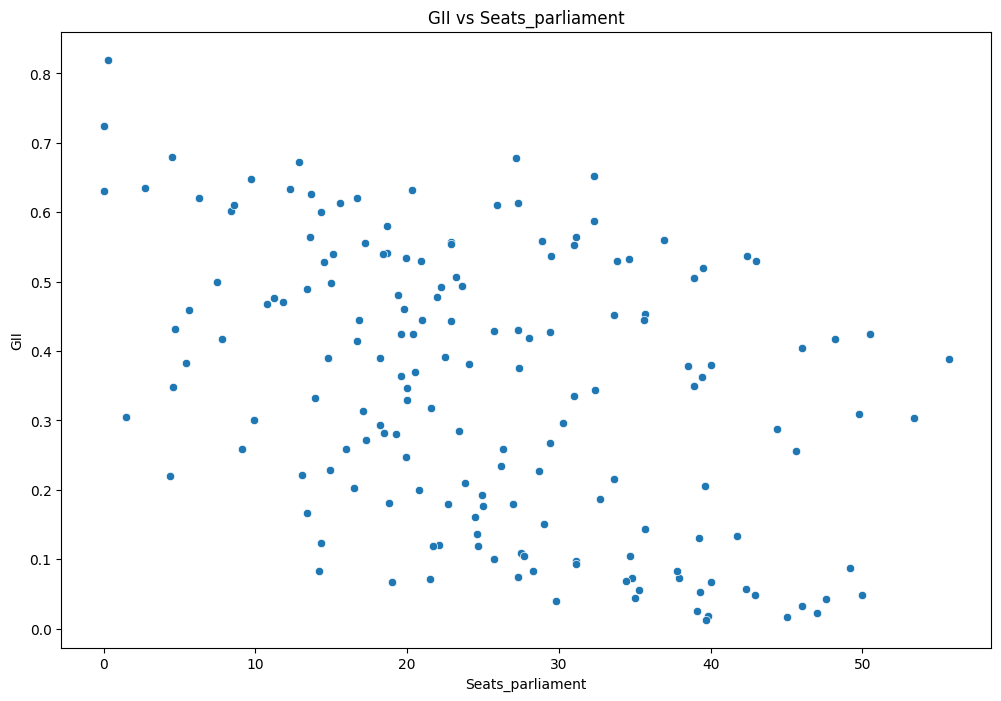

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x= 'F_secondary_educ', y='GII', data=df)
plt.title('GII vs F_secondary_educ')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='F_Labour_force', y='GII', data=df)
plt.title('GII vs F_Labour_force')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Seats_parliament', y='GII', data=df)
plt.title('GII vs Seats_parliament')
plt.show()

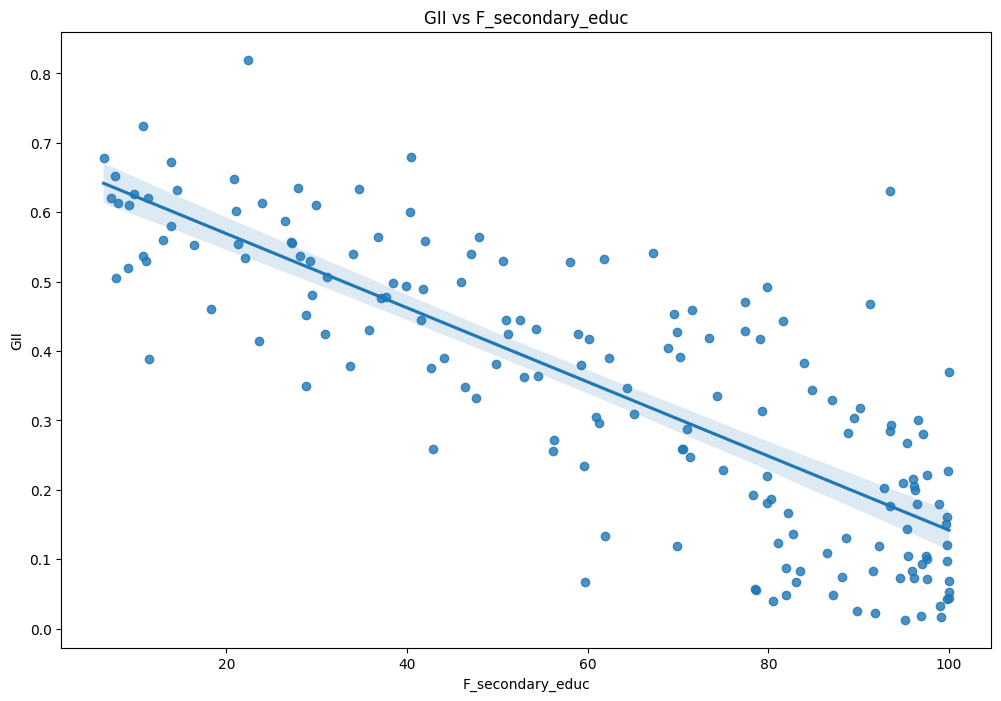

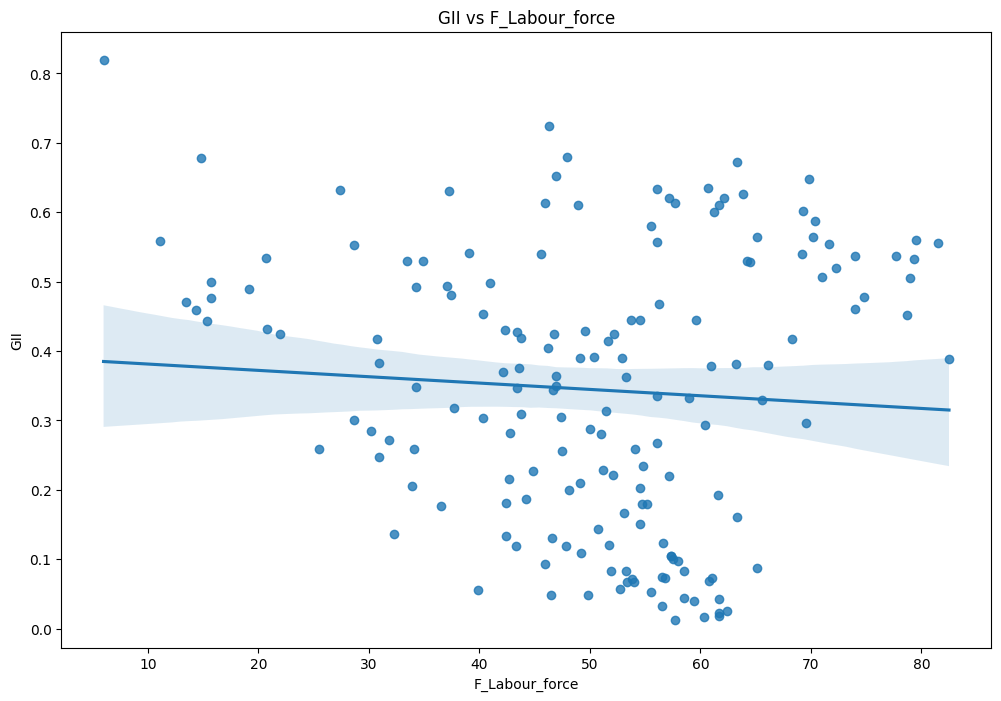

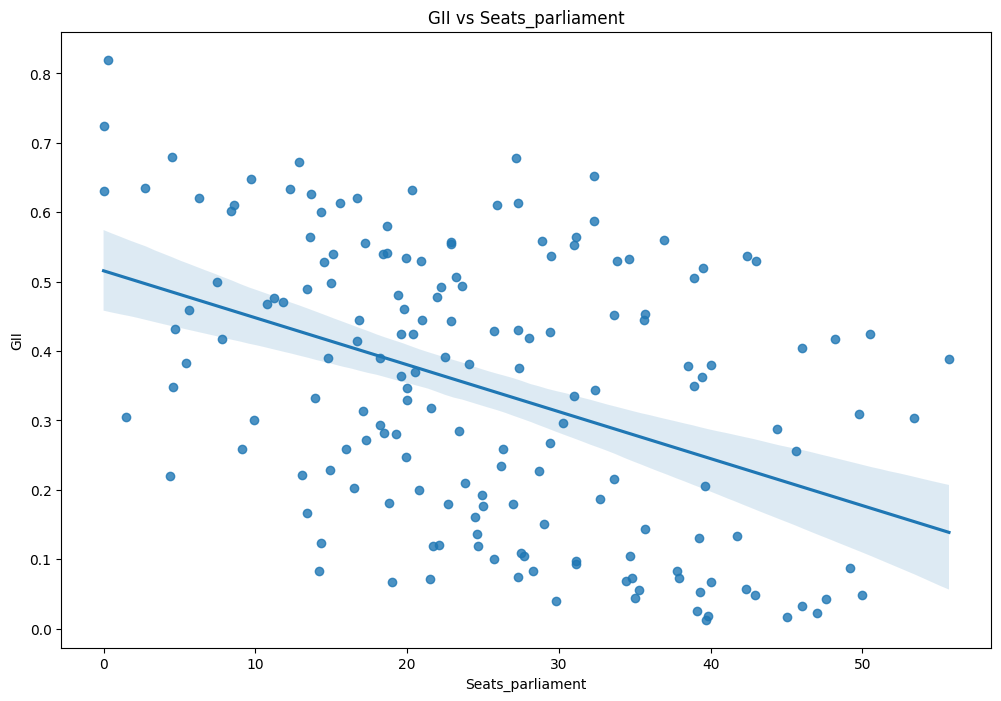

In [14]:
# GII vs F_secondary_educ
plt.figure(figsize=(12, 8))
sns.regplot(x='F_secondary_educ', y='GII', data=df)
plt.title('GII vs F_secondary_educ')
plt.show()

# GII vs F_Labour_force
plt.figure(figsize=(12, 8))
sns.regplot(x='F_Labour_force', y='GII', data=df)
plt.title('GII vs F_Labour_force')
plt.show()

# GII vs Seats_parliament
plt.figure(figsize=(12, 8))
sns.regplot(x='Seats_parliament', y='GII', data=df)
plt.title('GII vs Seats_parliament')
plt.show()

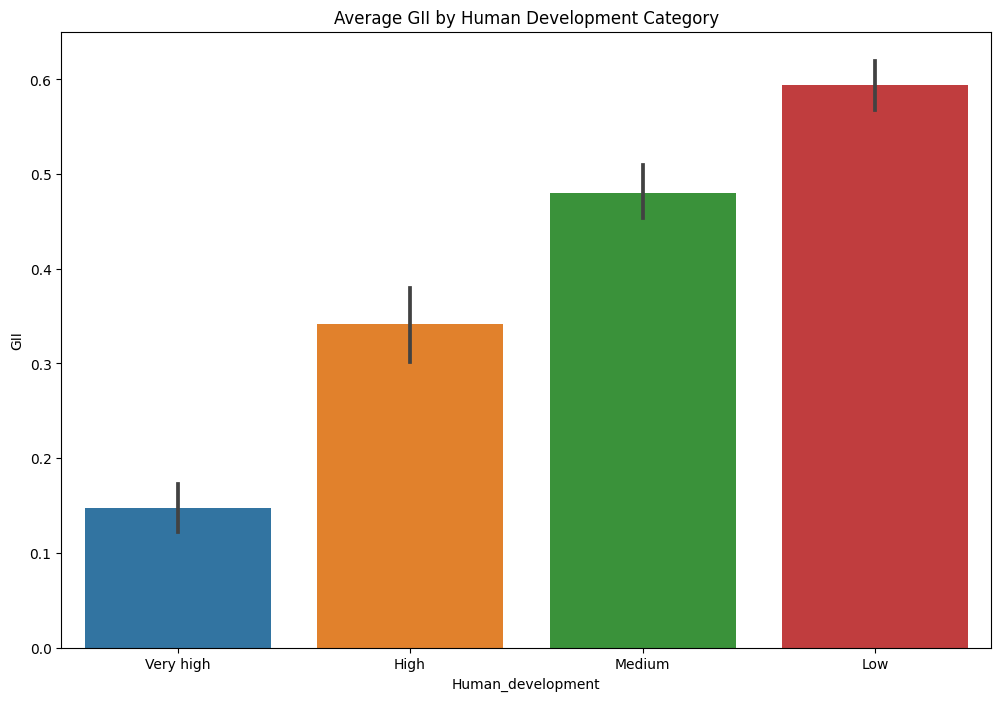

In [15]:
#Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Human_development', y='GII', data=df)
plt.title('Average GII by Human Development Category')
plt.show()


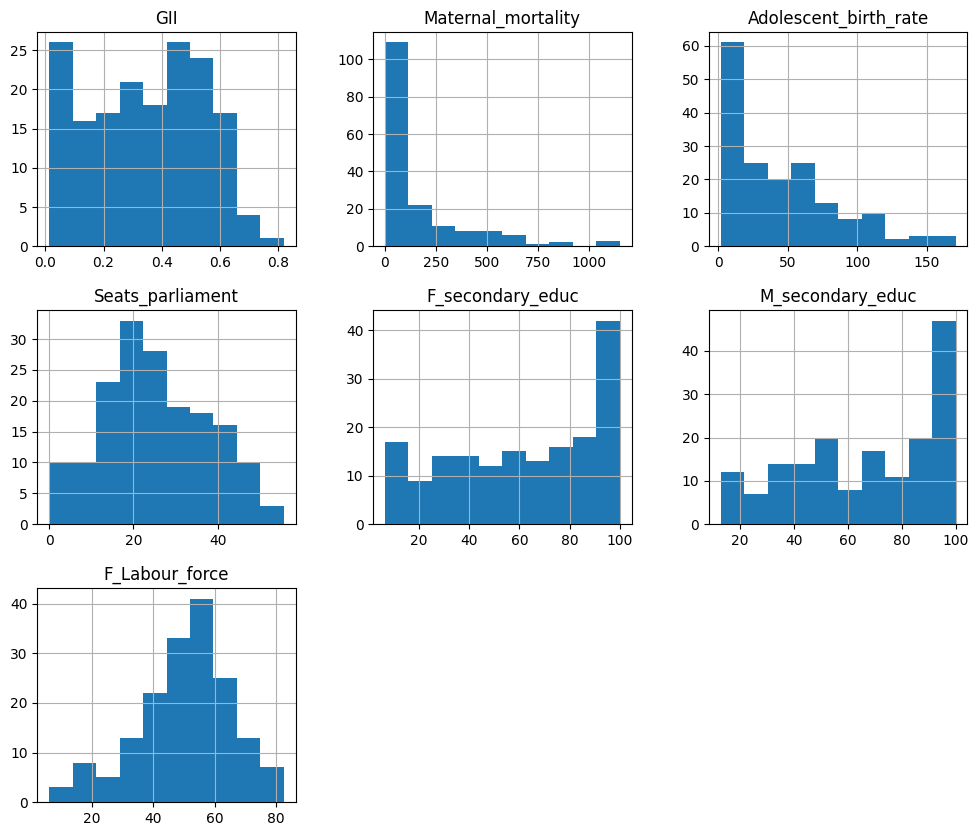

In [16]:
df[['GII', 'Maternal_mortality', 'Adolescent_birth_rate', 'Seats_parliament',
    'F_secondary_educ', 'M_secondary_educ', 'F_Labour_force']].hist(figsize=(12, 10))
plt.show()


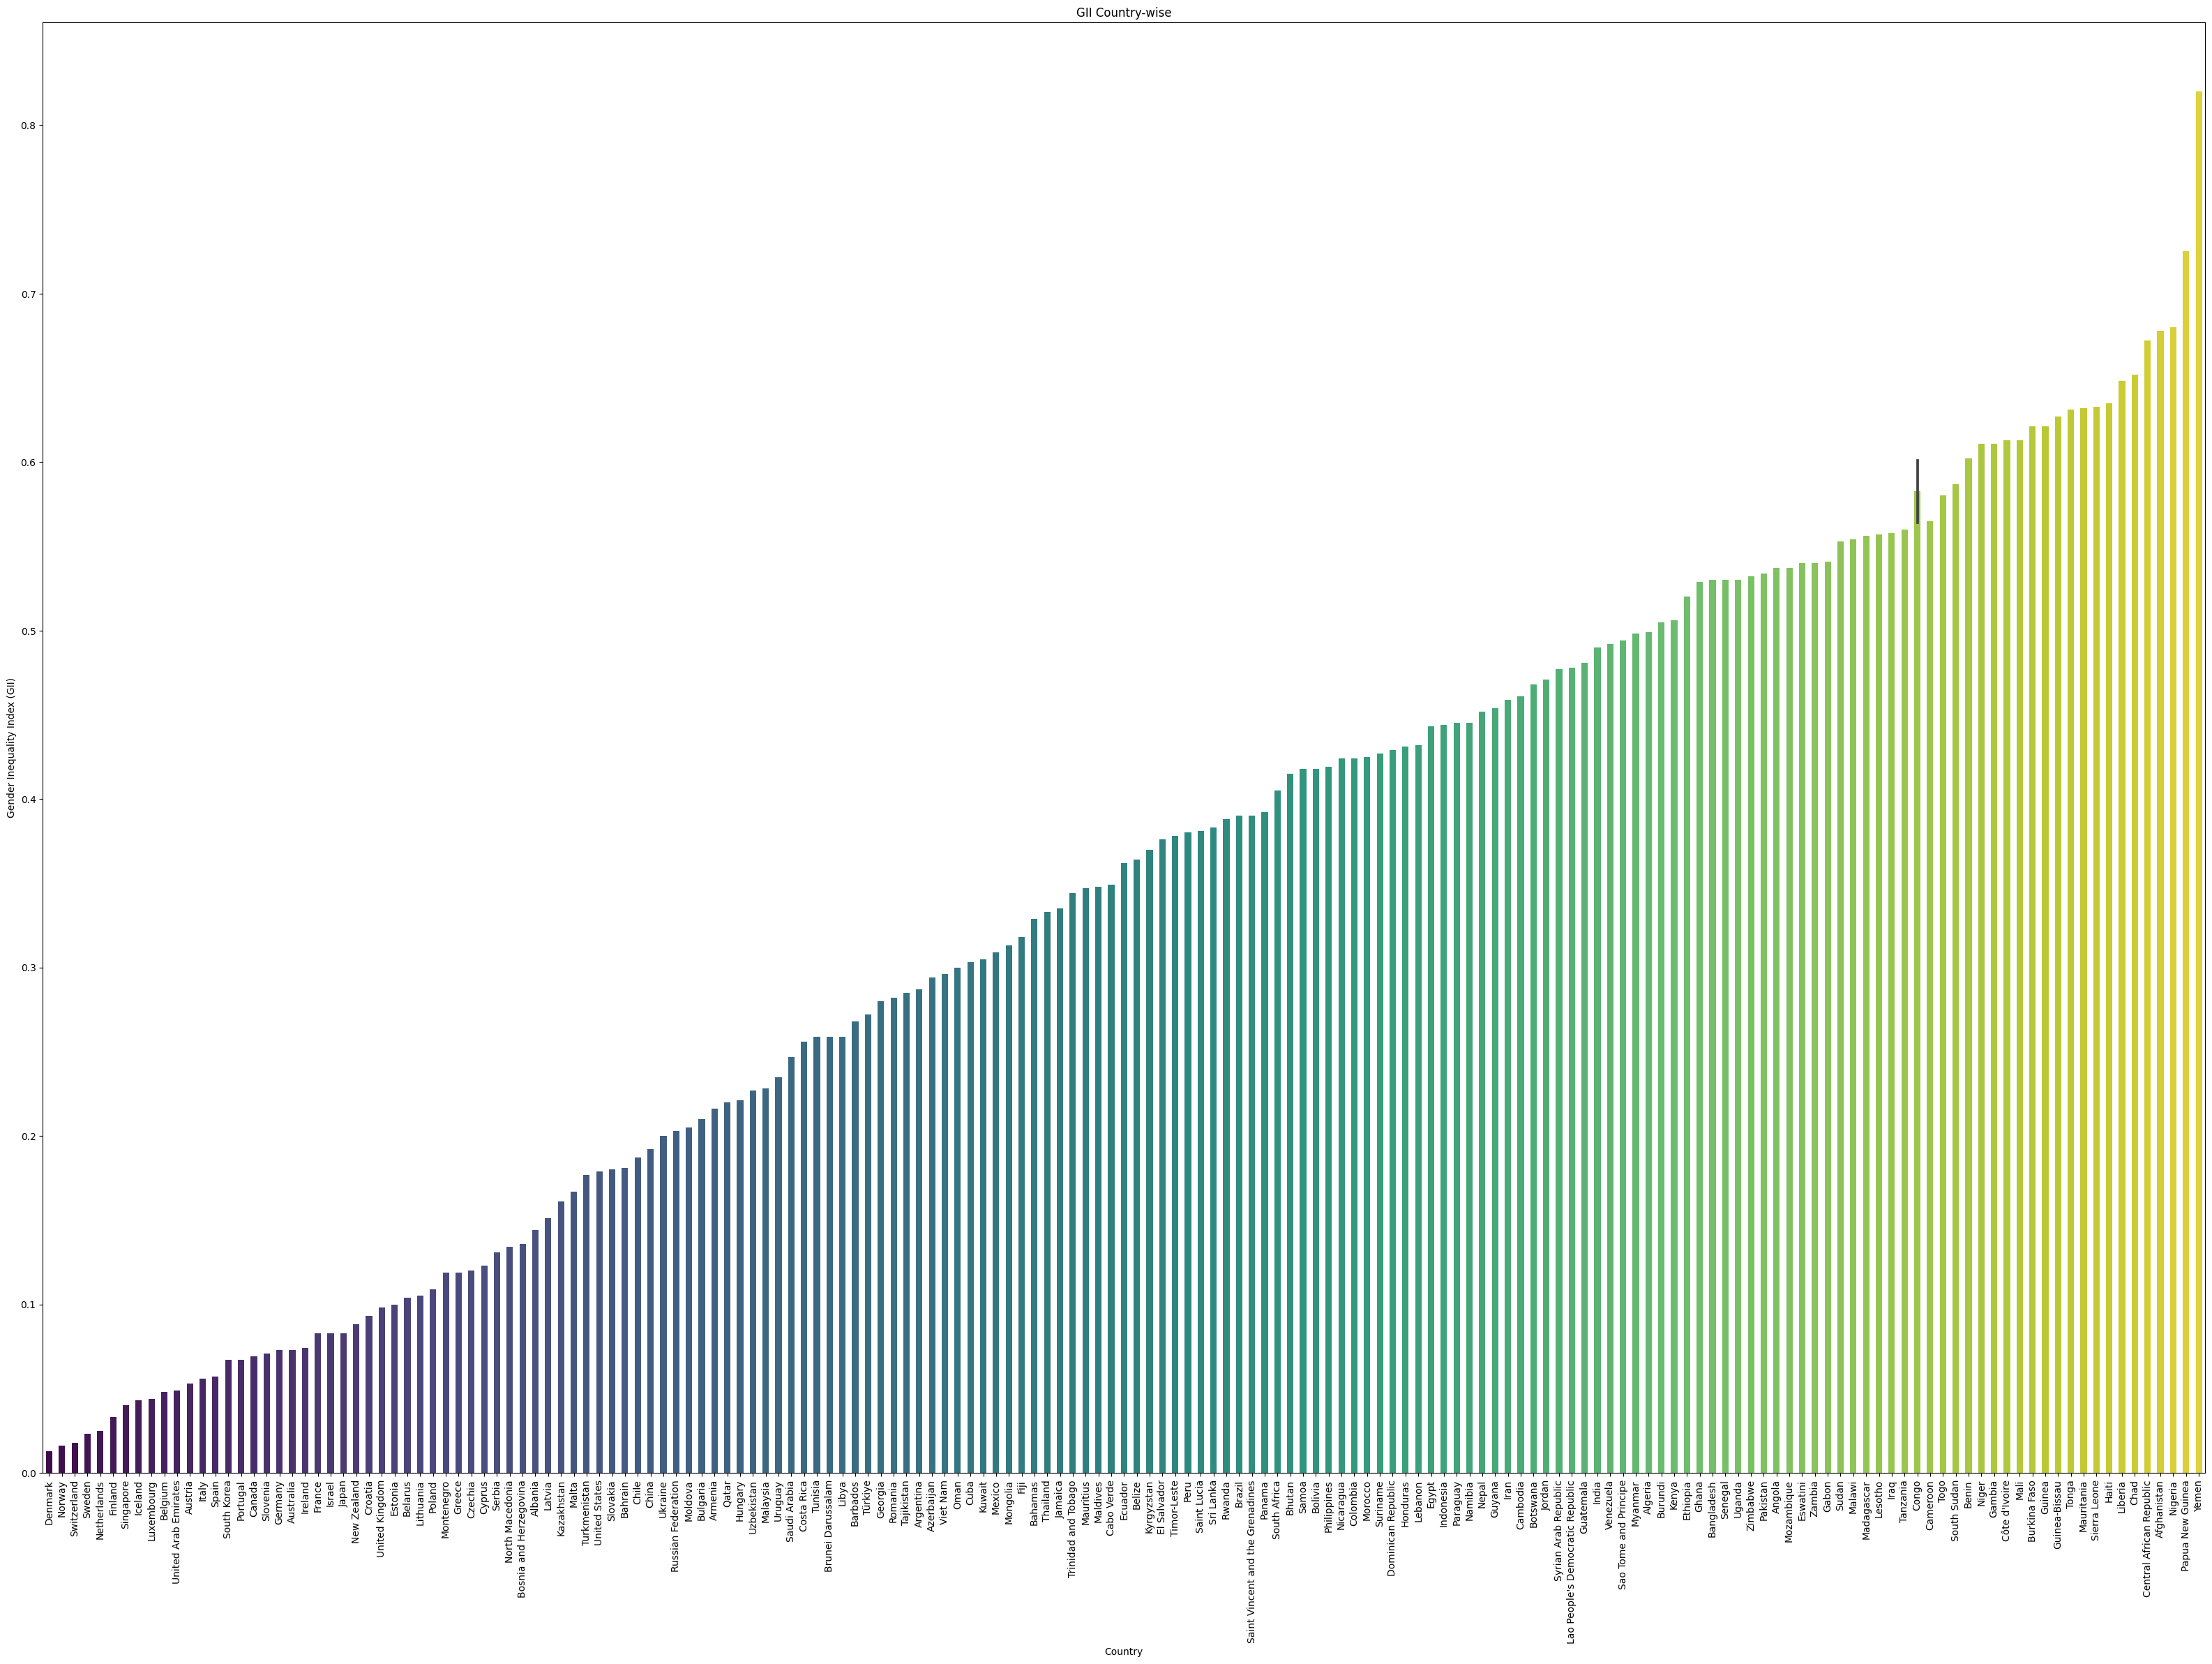

In [17]:
df.sort_values(by=['GII'],ascending=True,inplace=True)
#plt.plot(x,y)
plt.figure(figsize=(40,27))
sns.barplot(x='Country', y='GII', data=df, palette='viridis',width=0.5)
plt.title('GII Country-wise')
plt.xlabel('Country')
plt.ylabel('Gender Inequality Index (GII)')
plt.xticks(rotation=90)
plt.show()

#  Adding GNI and HDI to the Dataset

In [18]:
df_gni = pd.read_csv('/kaggle/input/gross-national-income-per-capita/Gross National Income Per Capita.csv')

In [19]:
df_gni.head()

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Gross National Income Per Capita (1990),Gross National Income Per Capita (1991),Gross National Income Per Capita (1992),...,Gross National Income Per Capita (2012),Gross National Income Per Capita (2013),Gross National Income Per Capita (2014),Gross National Income Per Capita (2015),Gross National Income Per Capita (2016),Gross National Income Per Capita (2017),Gross National Income Per Capita (2018),Gross National Income Per Capita (2019),Gross National Income Per Capita (2020),Gross National Income Per Capita (2021)
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,2684.550019,2276.289409,2059.868084,...,2125.862821,2193.553936,2178.507021,2101.589319,2077.566899,2085.487571,2054.939895,2097.889450,1997.852149,1824.190915
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,4845.706901,5405.349257,2073.902390,...,7280.845666,7478.104777,7704.231949,7652.656486,7189.426672,6861.575738,6381.521946,6082.746624,5593.142060,5465.617791
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,4742.215529,3358.087827,3080.746654,...,11146.263030,11552.982470,11691.648290,12016.297600,12484.624200,12802.148310,13302.705960,13485.311240,12996.762910,14131.110390
3,AND,Andorra,Europe,Northern Hemisphere,Very High,NaN,40.0,43773.146500,43175.147600,41935.787200,...,47126.814610,46385.095200,48483.720320,49936.874540,52267.738320,52650.225760,53483.306630,54465.047400,47878.666640,51166.626610
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,102433.136000,96250.290360,93043.477370,...,57445.954750,60005.695360,62573.505310,65577.512240,66881.329740,67667.508460,67195.095230,68590.900940,63016.401220,62573.591810


In [20]:
df_gni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ISO3                                     195 non-null    object 
 1   Country                                  195 non-null    object 
 2   Continent                                195 non-null    object 
 3   Hemisphere                               195 non-null    object 
 4   Human Development Groups                 191 non-null    object 
 5   UNDP Developing Regions                  151 non-null    object 
 6   HDI Rank (2021)                          191 non-null    float64
 7   Gross National Income Per Capita (1990)  184 non-null    float64
 8   Gross National Income Per Capita (1991)  184 non-null    float64
 9   Gross National Income Per Capita (1992)  184 non-null    float64
 10  Gross National Income Per Capita (1993)  184 non-n

In [21]:
df_gni  =df_gni [['Country','HDI Rank (2021)', 'Gross National Income Per Capita (2021)']]

In [22]:
df_gni.head()

,Country,HDI Rank (2021),Gross National Income Per Capita (2021)
0,Afghanistan,180.0,1824.190915
1,Angola,148.0,5465.617791
2,Albania,67.0,14131.110390
3,Andorra,40.0,51166.626610
4,United Arab Emirates,26.0,62573.591810


In [23]:
# Merge the datasets on the 'Country' column
df_combined = pd.merge(df, df_gni, on='Country', how='inner')


In [24]:
df_combined.head()

,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force,HDI Rank (2021),Gross National Income Per Capita (2021)
0,Denmark,Very high,0.013,1.0,4.0,1.9,39.7,95.1,95.2,57.7,66.7,6.0,60364.78595
1,Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0,2.0,64660.10622
2,Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7,1.0,66933.00454
3,Sweden,Very high,0.023,4.0,4.0,3.3,47.0,91.8,92.2,61.7,68.0,7.0,54489.37401
4,Netherlands,Very high,0.025,5.0,5.0,2.8,39.1,89.8,92.7,62.4,71.3,10.0,55979.41100


In [70]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                166 non-null    object 
 1   Human_development      166 non-null    object 
 2   GII                    166 non-null    float64
 3   Rank                   166 non-null    float64
 4   Maternal_mortality     166 non-null    float64
 5   Adolescent_birth_rate  166 non-null    float64
 6   Seats_parliament       166 non-null    float64
 7   F_secondary_educ       166 non-null    float64
 8   M_secondary_educ       166 non-null    float64
 9   F_Labour_force         166 non-null    float64
 10  M_Labour_force         166 non-null    float64
 11  HDI                    166 non-null    float64
 12  GNI                    166 non-null    float64
dtypes: float64(11), object(2)
memory usage: 17.0+ KB


In [26]:
df_combined.tail()

,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force,HDI Rank (2021),Gross National Income Per Capita (2021)
161,Central African Republic,Low,0.672,166.0,829.0,160.5,12.9,13.9,31.6,63.3,79.5,188.0,966.058611
162,Afghanistan,Low,0.678,167.0,638.0,82.6,27.2,6.4,14.9,14.8,66.5,180.0,1824.190915
163,Nigeria,Low,0.680,168.0,917.0,101.7,4.5,40.4,55.3,47.9,59.6,163.0,4790.284425
164,Papua New Guinea,Medium,0.725,169.0,145.0,55.3,0.0,10.8,15.5,46.3,48.1,156.0,4008.623573
165,Yemen,Low,0.820,170.0,164.0,54.4,0.3,22.4,37.5,6.0,67.6,183.0,1314.270189


In [27]:
df_combined.rename(columns={'Gross National Income Per Capita (2021)': 'GNI'}, inplace=True)
df_combined.rename(columns={'HDI Rank (2021)': 'HDI'}, inplace=True)

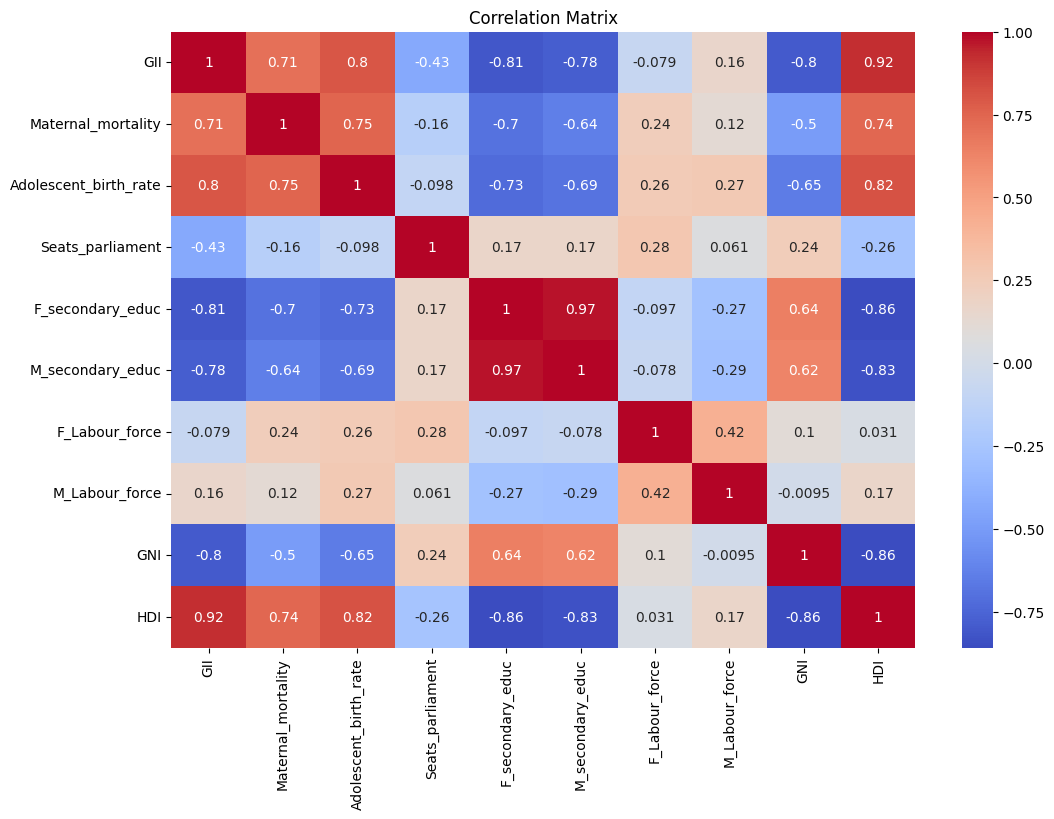

In [28]:
numerical_columns = ['GII', 'Maternal_mortality', 'Adolescent_birth_rate', 
                     'Seats_parliament', 'F_secondary_educ', 
                     'M_secondary_educ', 'F_Labour_force','M_Labour_force','GNI','HDI']


df_numerical = df_combined[numerical_columns]
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


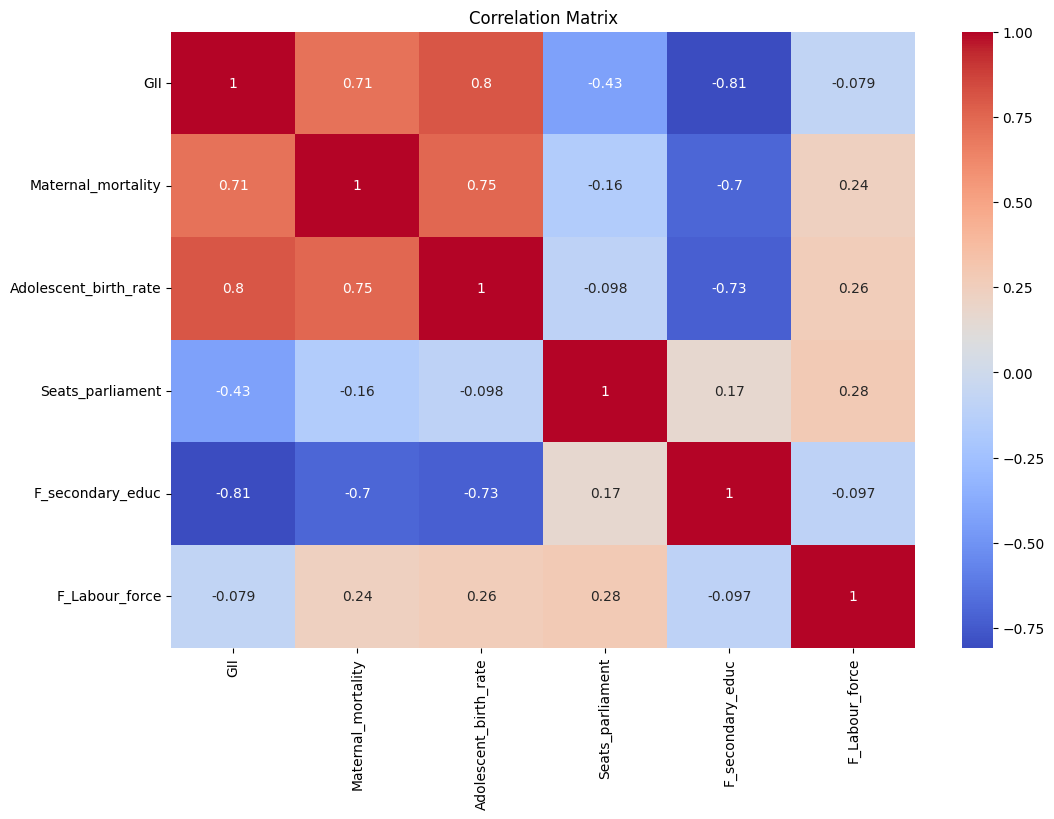

In [29]:
numerical_columns = ['GII', 'Maternal_mortality', 'Adolescent_birth_rate', 
                     'Seats_parliament', 'F_secondary_educ', 'F_Labour_force']

df_numerical = df_combined[numerical_columns]

correlation_matrix = df_numerical.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

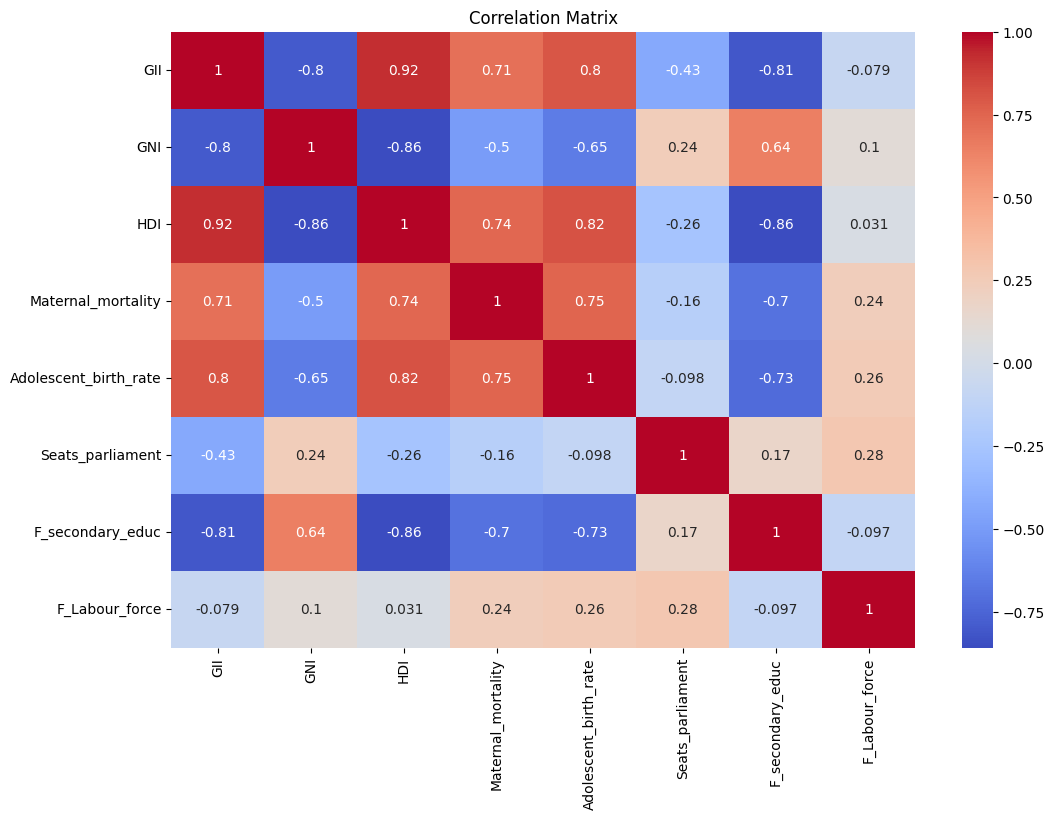

In [30]:
numerical_columns = ['GII','GNI','HDI', 'Maternal_mortality', 'Adolescent_birth_rate', 
                     'Seats_parliament', 'F_secondary_educ', 'F_Labour_force']

df_numerical = df_combined[numerical_columns]

correlation_matrix = df_numerical.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

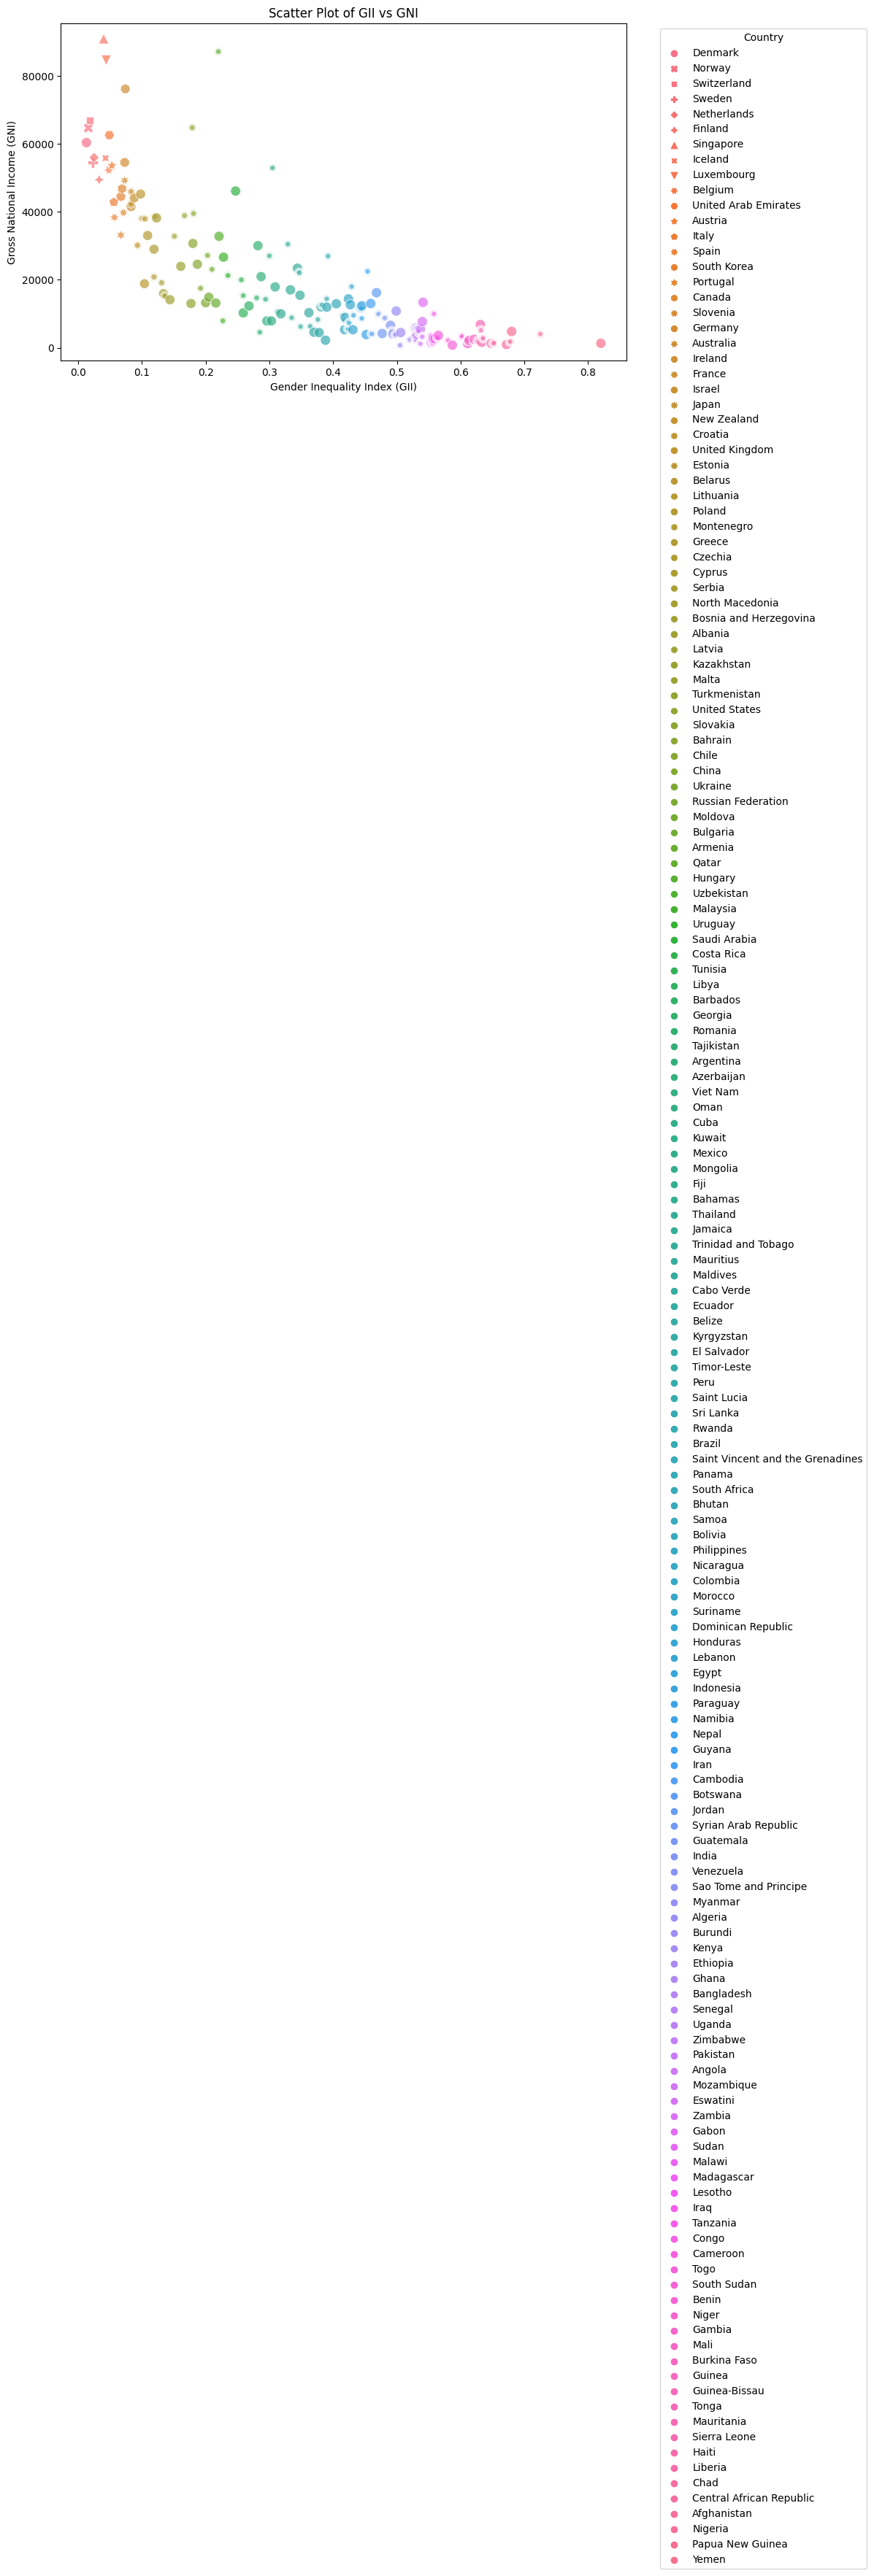

In [31]:
# Scatter plot for GII vs GNI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x='GII', y='GNI', hue='Country',style='Country', alpha=0.7, s=100)
plt.title('Scatter Plot of GII vs GNI')
plt.xlabel('Gender Inequality Index (GII)')
plt.ylabel('Gross National Income (GNI)')
plt.legend(title='Country',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

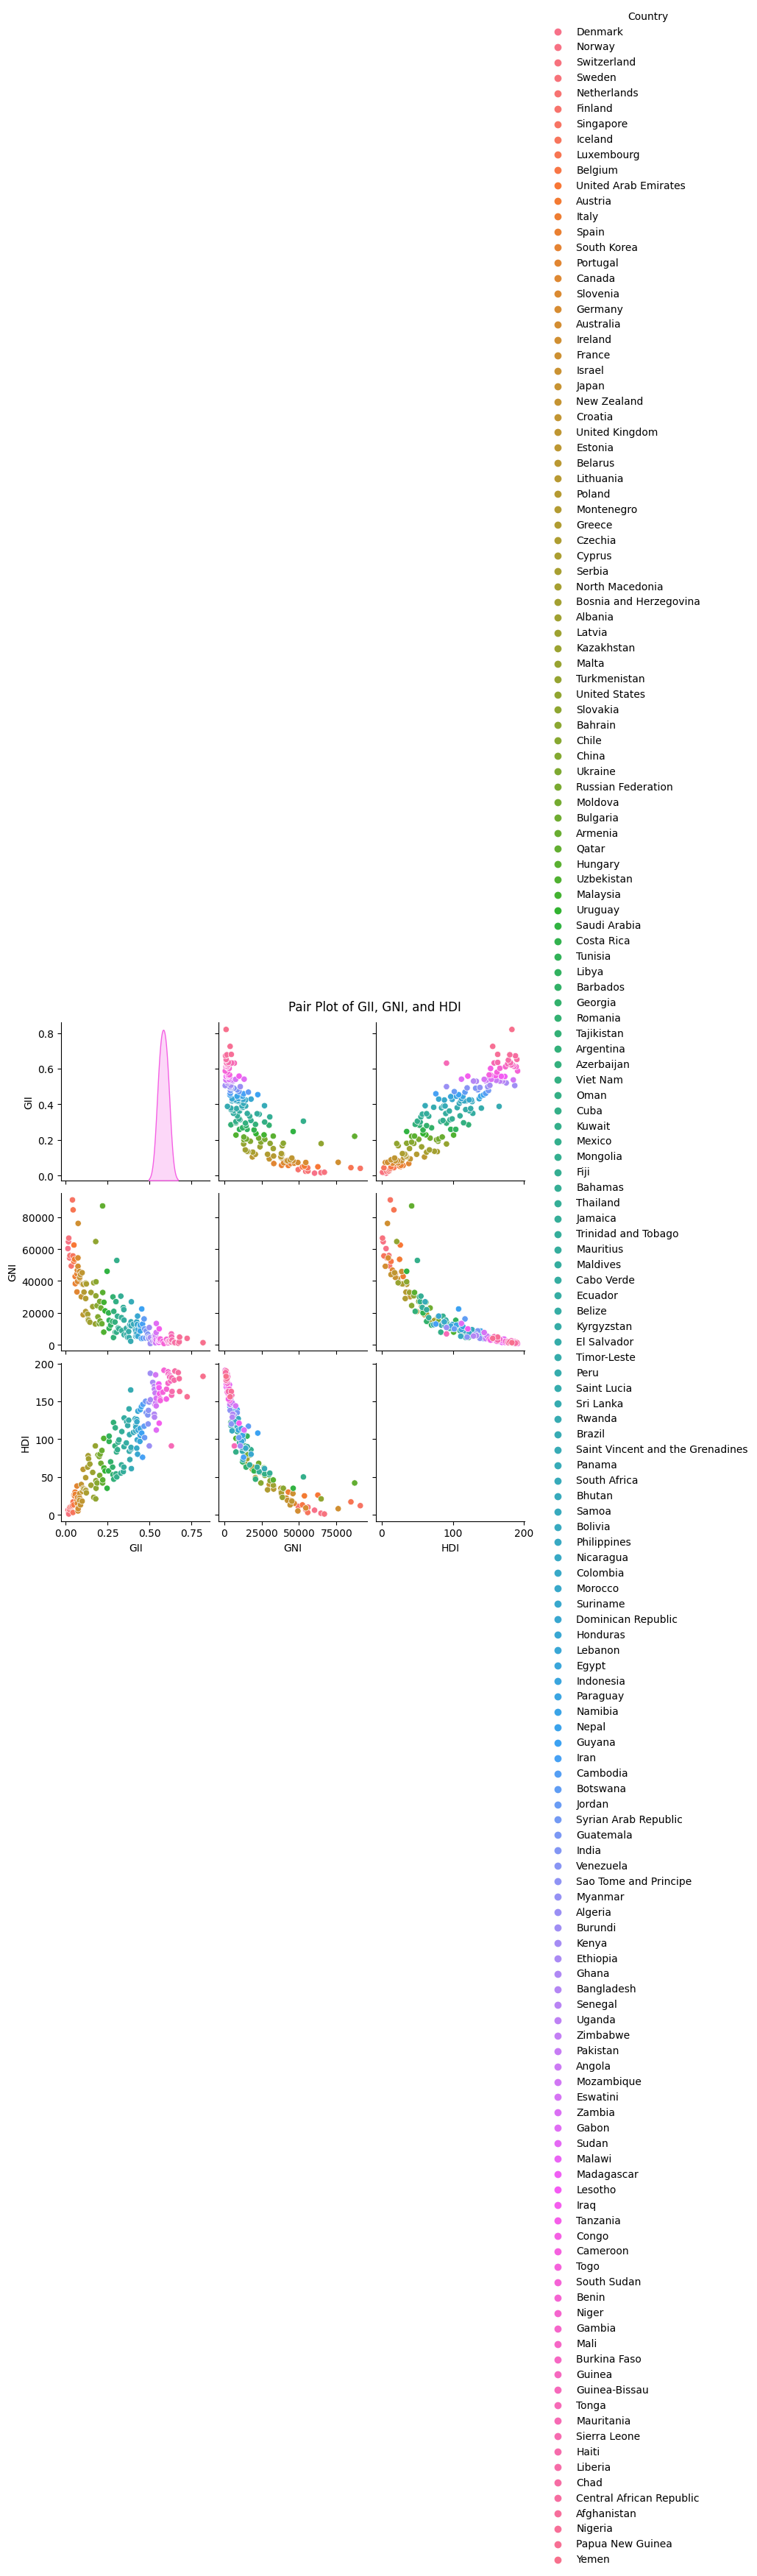

In [32]:
# Pair plot for multiple variables
sns.pairplot(df_combined, vars=['GII', 'GNI', 'HDI'], hue='Country')
plt.suptitle('Pair Plot of GII, GNI, and HDI', y=1.02)
plt.show()

In [33]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

df_no_outliers = df_combined.copy()
for column in ['GII', 'Maternal_mortality', 'Adolescent_birth_rate', 
                     'Seats_parliament', 'F_secondary_educ', 
                     'M_secondary_educ', 'F_Labour_force','M_Labour_force','GNI','HDI']:
    df_no_outliers = remove_outliers(df_no_outliers, column)

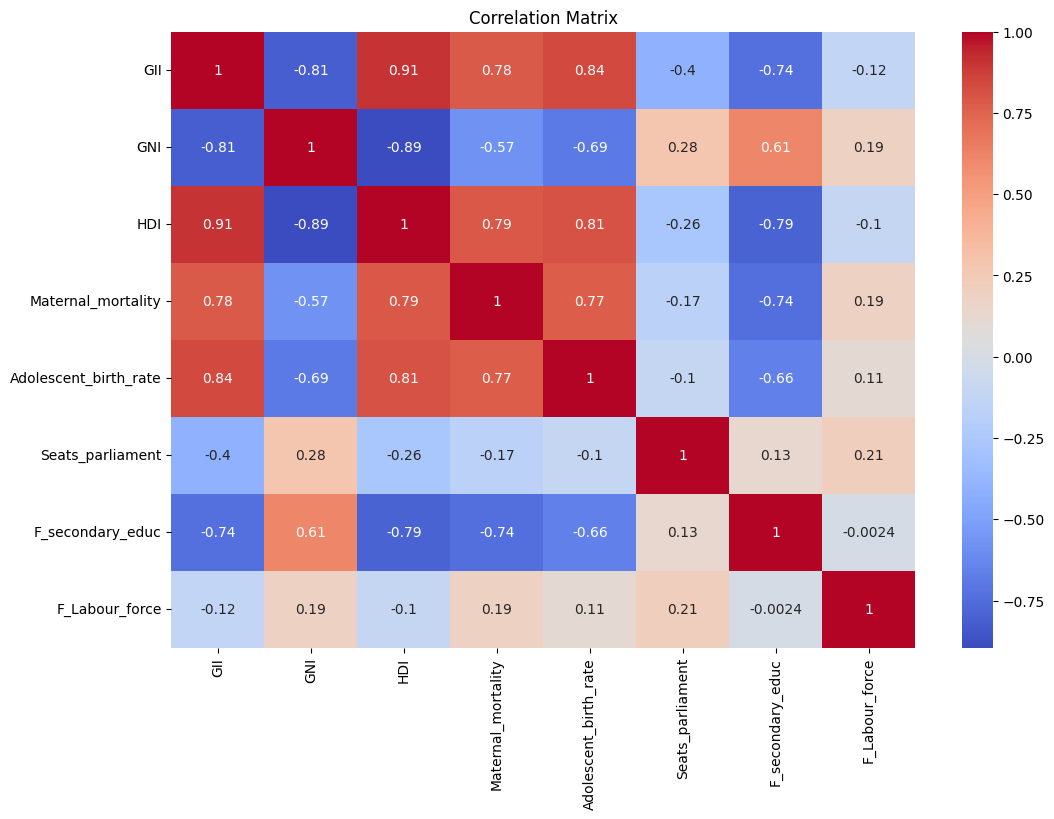

In [34]:
df_numerical = df_no_outliers[numerical_columns]

correlation_matrix = df_numerical.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

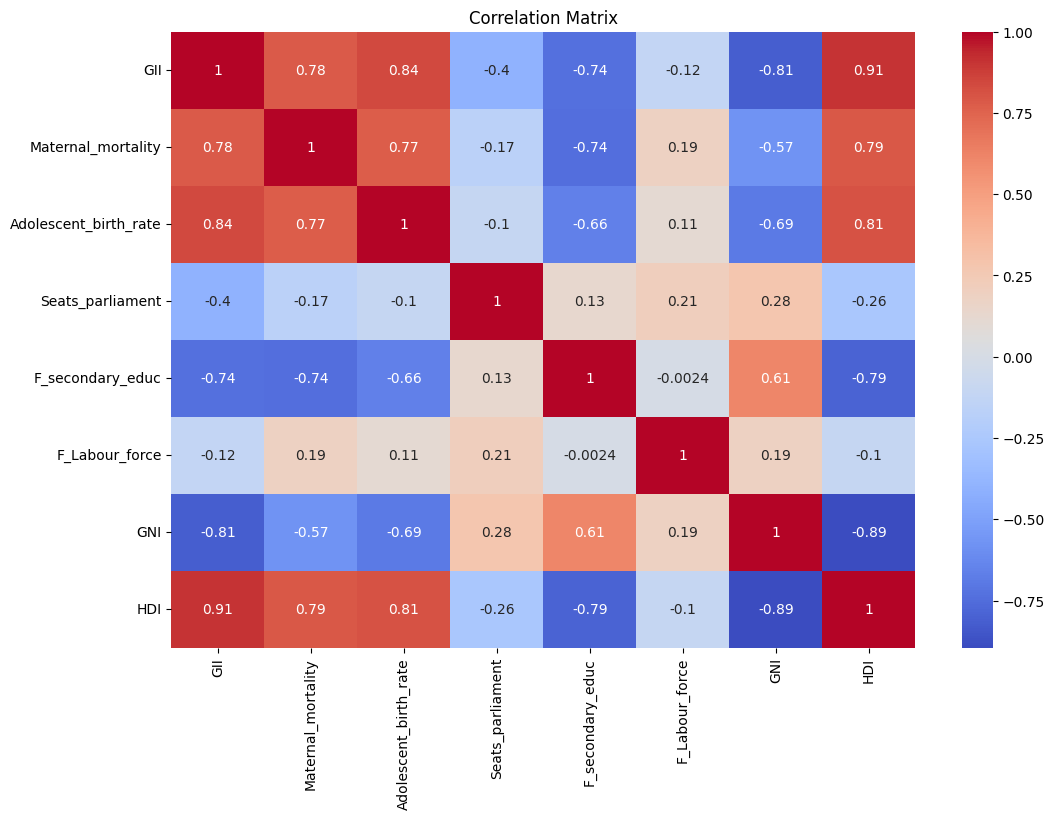

In [35]:
numerical_columns = ['GII', 'Maternal_mortality', 'Adolescent_birth_rate', 
                     'Seats_parliament', 'F_secondary_educ', 'F_Labour_force','GNI','HDI']
df_numerical = df_no_outliers[numerical_columns]


correlation_matrix = df_numerical.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Linear Regression Model

Scenario 1 - Mean Squared Error: 80143942.77683005
Scenario 1 - R^2 Score: 0.6946583823806045


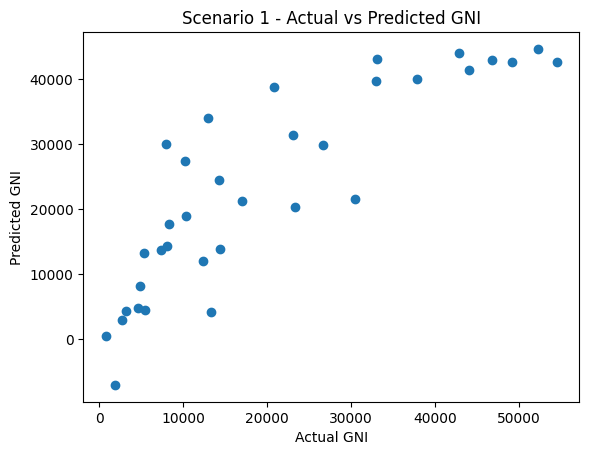

In [41]:

df_scenario1 = df_combined[['GNI', 'GII']]
X1 = df_scenario1[['GII']]
y1 = df_scenario1['GNI']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


model1 = LinearRegression()
model1.fit(X1_train, y1_train)


y1_pred = model1.predict(X1_test)


mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)

print(f"Scenario 1 - Mean Squared Error: {mse1}")
print(f"Scenario 1 - R^2 Score: {r2_1}")


plt.scatter(y1_test, y1_pred)
plt.xlabel('Actual GNI')
plt.ylabel('Predicted GNI')
plt.title('Scenario 1 - Actual vs Predicted GNI')
plt.show()


Scenario 2 - Mean Squared Error: 41507837.06052022
Scenario 2 - R^2 Score: 0.8418586648870778


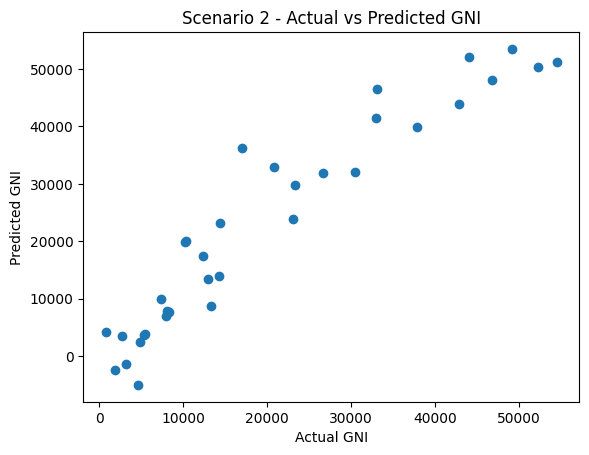

In [42]:
df_scenario2 = df_combined[['GNI', 'GII', 'HDI', 'Maternal_mortality', 'Adolescent_birth_rate', 'Seats_parliament', 'F_secondary_educ', 'M_secondary_educ', 'F_Labour_force']]

X2 = df_scenario2.drop('GNI', axis=1)
y2 = df_scenario2['GNI']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

y2_pred = model2.predict(X2_test)

mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

print(f"Scenario 2 - Mean Squared Error: {mse2}")
print(f"Scenario 2 - R^2 Score: {r2_2}")

plt.scatter(y2_test, y2_pred)
plt.xlabel('Actual GNI')
plt.ylabel('Predicted GNI')
plt.title('Scenario 2 - Actual vs Predicted GNI')
plt.show()


In [71]:
df_model = df_combined[['GII', 'GNI', 'HDI']] 
X = df_model[['GII', 'HDI']]
y = df_model['GNI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Linear Regression Model Evaluation

In [72]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"R^2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

R^2 Score: 0.8297065498094043
Mean Squared Error: 44697439.653824426
Mean Absolute Error: 5657.288166900759
Root Mean Squared Error: 6685.614381178773


In [73]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 44697439.653824426
R^2 Score: 0.8297065498094043


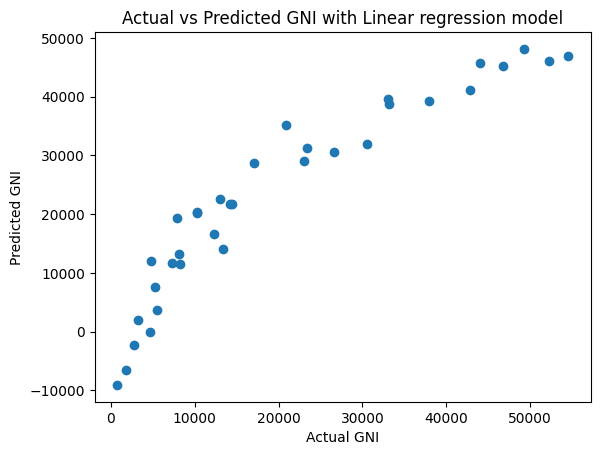

In [74]:
# Plotting the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual GNI')
plt.ylabel('Predicted GNI')
plt.title('Actual vs Predicted GNI with Linear regression model')
plt.show()

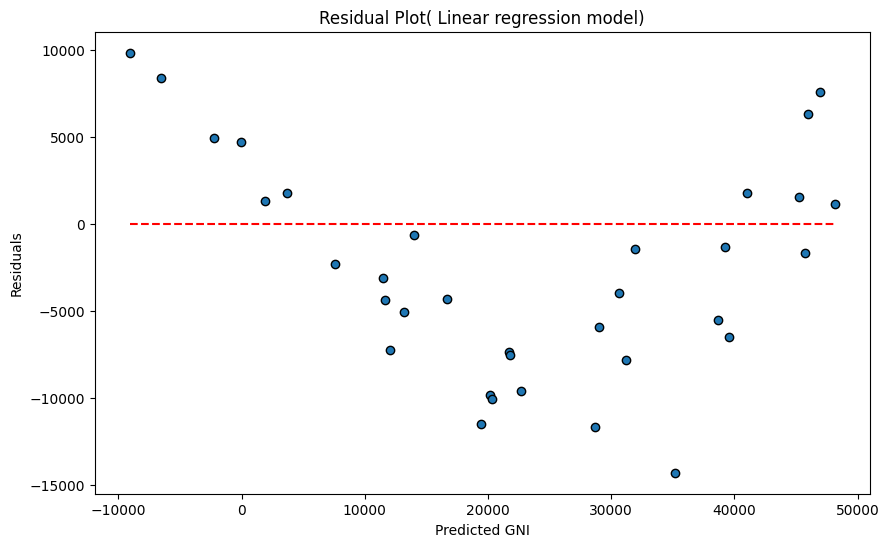

In [75]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted GNI')
plt.ylabel('Residuals')
plt.title('Residual Plot( Linear regression model)')
plt.show()

# KNN Models

/tmp/ipykernel_33/3511229804.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scenario1.dropna(inplace=True)


Scenario 1 - Mean Squared Error: 107637156.61271006
Scenario 1 - R^2 Score: 0.5899115718876407


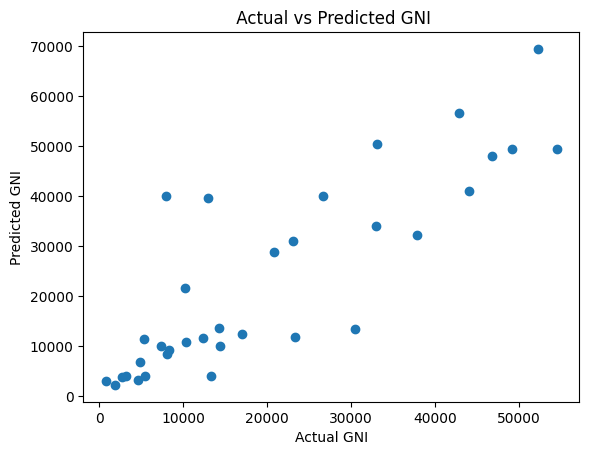

In [43]:
df_scenario1 = df_combined[['GNI', 'GII']]

df_scenario1.dropna(inplace=True)
X1 = df_scenario1[['GII']]
y1 = df_scenario1['GNI']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

knn1 = KNeighborsRegressor(n_neighbors=5)
knn1.fit(X1_train_scaled, y1_train)

y1_pred = knn1.predict(X1_test_scaled)

mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)

print(f"Scenario 1 - Mean Squared Error: {mse1}")
print(f"Scenario 1 - R^2 Score: {r2_1}")

plt.scatter(y1_test, y1_pred)
plt.xlabel('Actual GNI')
plt.ylabel('Predicted GNI')
plt.title(' Actual vs Predicted GNI')
plt.show()


/tmp/ipykernel_33/442490206.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scenario2.dropna(inplace=True)


Scenario 2 - Mean Squared Error: 44093492.71705449
Scenario 2 - R^2 Score: 0.8320075363623509


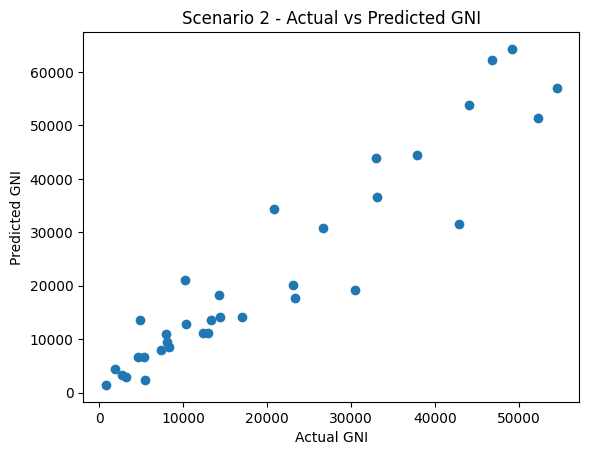

In [44]:
df_scenario2 = df_combined[['GNI', 'GII', 'HDI', 'Maternal_mortality', 'Adolescent_birth_rate', 'Seats_parliament', 'F_secondary_educ', 'M_secondary_educ', 'F_Labour_force']]

df_scenario2.dropna(inplace=True)

X2 = df_scenario2.drop('GNI', axis=1)
y2 = df_scenario2['GNI']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(X2_train_scaled, y2_train)

y2_pred = knn2.predict(X2_test_scaled)

mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

print(f"Scenario 2 - Mean Squared Error: {mse2}")
print(f"Scenario 2 - R^2 Score: {r2_2}")

plt.scatter(y2_test, y2_pred)
plt.xlabel('Actual GNI')
plt.ylabel('Predicted GNI')
plt.title('Scenario 2 - Actual vs Predicted GNI')
plt.show()


/tmp/ipykernel_33/1139184995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knn.dropna(inplace=True)


Mean Squared Error: 29240778.60148078
R^2 Score: 0.8885951161213896


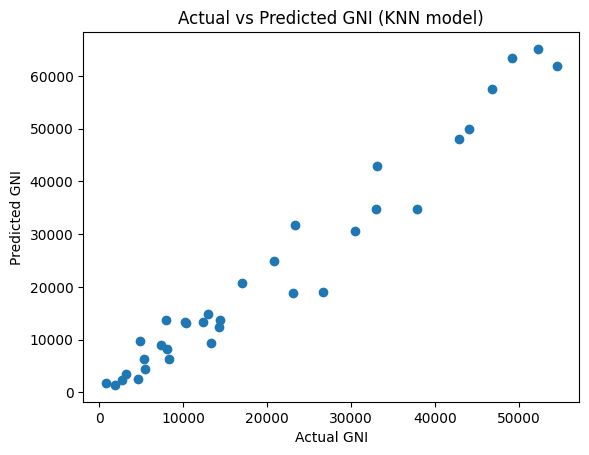

In [76]:
df_knn = df_combined[['GNI', 'GII', 'HDI']]

df_knn.dropna(inplace=True)

X = df_knn[['GII', 'HDI']]
y = df_knn['GNI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual GNI')
plt.ylabel('Predicted GNI')
plt.title('Actual vs Predicted GNI (KNN model)')
plt.show()


# KNN Model Evaluation

In [63]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}%")

Mean Squared Error: 29240778.60148078
R^2 Score: 0.8885951161213896
Mean Absolute Error: 3962.3409343311755
Root Mean Squared Error: 5407.47432739914
Mean Absolute Percentage Error: 26.312548221206722%


In [64]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R^2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

R^2 Score: 0.8885951161213896
Mean Squared Error: 29240778.60148078
Mean Absolute Error: 3962.3409343311755
Root Mean Squared Error: 5407.47432739914


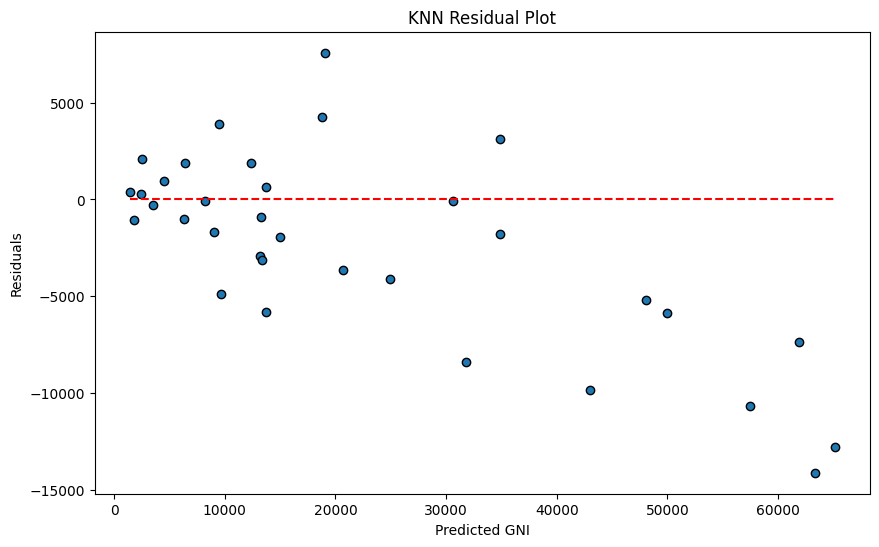

In [51]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted GNI')
plt.ylabel('Residuals')
plt.title('KNN Residual Plot')
plt.show()